<a href="https://colab.research.google.com/github/Erandi25/AuditAndTheVisual_Showdown/blob/main/Audit_AndTheVisual_Showdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Load Data

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset from scikit-learn
data = load_breast_cancer()

# Create a DataFrame for easier viewing
# data. data contains the features (X)
# data. feature_names contains the column names
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
header=None)

# Let's clean it up to make it user-friendly
# The online CSV version has IDs and diagnosis as the first two columns.
# We will define column names manually for clarity.
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
                'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave_points_worst',
                'symmetry_worst', 'fractal_dimension_worst']

df.columns = column_names

# Map diagnosis to binary: M (Malignant) = 1, B (Benign) = 0
# This is our target (y)
df['diagnosis'] = df ['diagnosis'].map({'M': 1, 'B': 0})

# Drop the 'id' column as it is not useful for prediction
df = df.drop('id', axis=1)

# Display the first few rows
print("Dataset Loaded Successfully!")
print(f"Shape: {df.shape} (Rows, Columns)")
display(df.head())

Dataset Loaded Successfully!
Shape: (569, 31) (Rows, Columns)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing (Scaling)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df ['diagnosis' ]

# 2. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data (Standardization)
# We fit the scaler ONLY on training data to prevent "data leakage"
scaler = StandardScaler( )
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled and ready.")

Data scaled and ready.


Train a KNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Get Predictions
y_pred = model.predict(X_test_scaled)

The Confusion Matrix (Visualizing Errors)

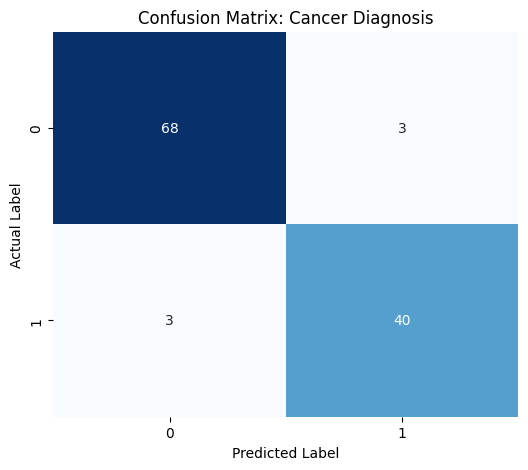

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it nicely
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Cancer Diagnosis')
plt.show()

The Professional Report (Precision, Recall, F1)


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        71
      benign       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



The ROC Curve & AUC

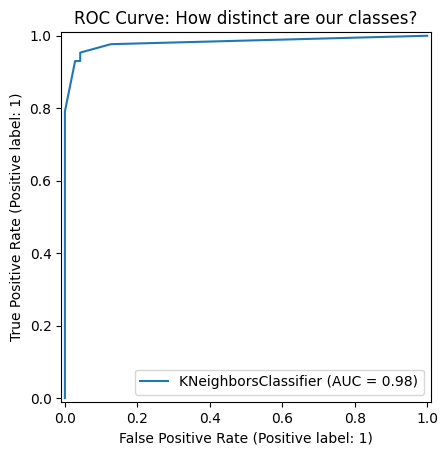

In [11]:
from sklearn.metrics import RocCurveDisplay

# plot the ROC Curve automatically
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve: How distinct are our classes?")
plt.show()


Testing on Everything (K-Fold)

In [13]:
from sklearn.model_selection import cross_val_score

# Run 10-Fold Cross-Validation
# This splits the data 10 different ways and tests the model 10 times
scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')

print(f"Accuracy Scores for each run: {scores}")
print(f"\nAverage Accuracy: {scores.mean()*100:.2f}%")
print(f"Standard Deviation: +/- {scores.std()*100:.2f}%")

Accuracy Scores for each run: [1.         0.95652174 0.97826087 0.95652174 0.97826087 1.
 0.97777778 0.97777778 0.95555556 0.88888889]

Average Accuracy: 96.70%
Standard Deviation: +/- 3.02%


(The Linear Map)

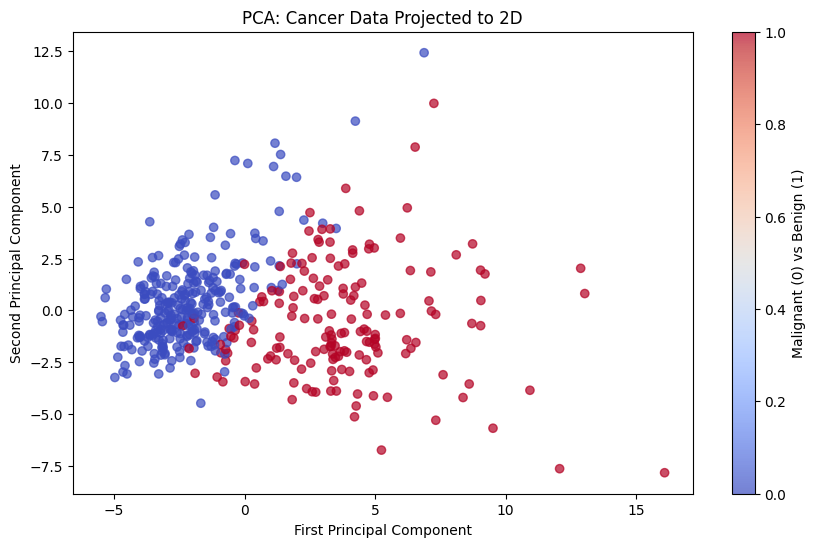

In [14]:
from sklearn.decomposition import PCA

# Compress 30 dimensions into 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA: Cancer Data Projected to 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Malignant (0) vs Benign (1)')
plt.show()



t-SNE (The Non-Linear Map)


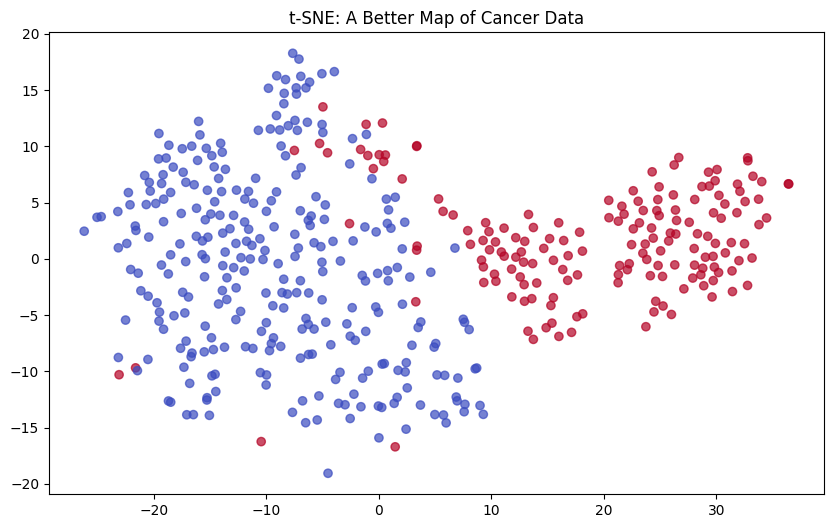

In [15]:
from sklearn.manifold import TSNE

# Compressing with t-SNE (This takes a few seconds!)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE: A Better Map of Cancer Data')
plt.show()

 The Feature Selector Challenge


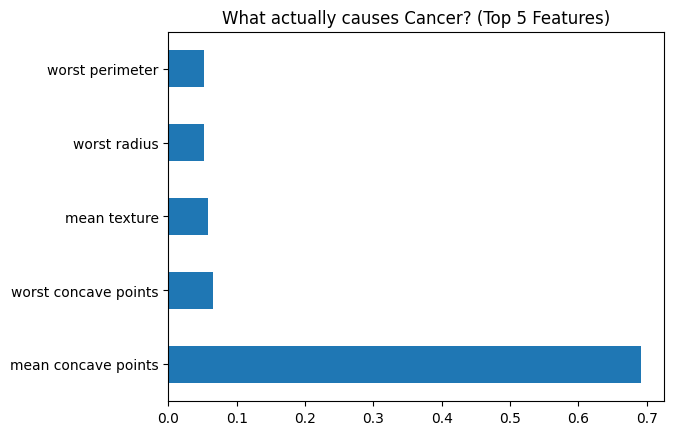

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

# Plot Feature Importance
feature_importance = pd. Series(tree.feature_importances_, index=data. feature_names)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("What actually causes Cancer? (Top 5 Features)")
plt.show()